In [6]:
import pandas as pd
import os as o
import re
import matplotlib.dates as mdates



#For Data Visualisation:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

#To override GGplot Style
import warnings
warnings.filterwarnings('ignore')

In [7]:
path = path = 'C:\\Users\\Dell\\Desktop\\Data Analytics\\Python\\Forage Project\\'
o.chdir(path)

In [8]:
o.getcwd()

'C:\\Users\\Dell\\Desktop\\Data Analytics\\Python\\Forage Project'

In [9]:
df = pd.read_excel('./ANZ/ANZ_dataset.xlsx')

In [10]:
df.head(1)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit


In [11]:
#Select Relevant Columns

df2 = df[['status', 'account',
       'long_lat', 'txn_description', 'merchant_id',
       'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat',
       'movement']]

In [12]:
df2.head(2)

,status,account,long_lat,txn_description,merchant_id,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,authorized,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit
1,authorized,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit


In [13]:
#Create a time column from extraction column
#df2.extraction = [" ".join(i.replace('T','_',).split()) for i in df2.extraction]
def cleantime (ct):
    ct = re.sub('T', '_', ct)
    ct = re.sub(':', '_', ct)
    return ct

In [14]:
df2['extraction'] = df2['extraction'].apply(cleantime)

In [15]:
df2['hour'] = df2['extraction'].apply(lambda x: x.split('_')[1])

In [16]:
#Remove CUS from Customer ID
df2['customer_id'] =[" ".join(i.replace('CUS-','',).split()) for i in df2['customer_id']]
df2['account'] =[" ".join(i.replace('ACC-','',).split()) for i in df2['account']]

In [17]:
df2.head(2)

,status,account,long_lat,txn_description,merchant_id,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,hour
0,authorized,1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01_01_01_15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,2487424745,153.38 -27.99,debit,01
1,authorized,1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01_01_13_45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,2487424745,151.21 -33.87,debit,01


In [18]:
df2.hour.unique()

array(['01', '02', '04', '06', '07', '08', '09', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00',
       '03', '05'], dtype=object)

In [19]:
df2 = df2[['status', 'account',
       'long_lat', 'txn_description', 'merchant_id',
       'balance', 'date', 'hour', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat',
       'movement']]

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   account            12043 non-null  object        
 2   long_lat           12043 non-null  object        
 3   txn_description    12043 non-null  object        
 4   merchant_id        7717 non-null   object        
 5   balance            12043 non-null  float64       
 6   date               12043 non-null  datetime64[ns]
 7   hour               12043 non-null  object        
 8   gender             12043 non-null  object        
 9   age                12043 non-null  int64         
 10  merchant_suburb    7717 non-null   object        
 11  merchant_state     7717 non-null   object        
 12  extraction         12043 non-null  object        
 13  amount             12043 non-null  float64       
 14  transa

In [556]:
df2.describe()

,balance,age,amount
count,12043.000000,12043.000000,12043.000000
mean,14704.195553,30.582330,187.933588
std,31503.722652,10.046343,592.599934
min,0.240000,18.000000,0.100000
25%,3158.585000,22.000000,16.000000
50%,6432.010000,28.000000,29.000000
75%,12465.945000,38.000000,53.655000
max,267128.520000,78.000000,8835.980000


### Transaction Analysis

In [155]:
#what is the average transaction amount?
avrtransamount = df2['amount'].mean()
avrtransamount

187.93358797641767

In [156]:
#Averahe Transaction per month
transpermonth = pd.DataFrame(df2.groupby(df2['date'].dt.strftime('%B'))['transaction_id'].count())
transpermonth

,transaction_id
date,
August,3943
October,4087
September,4013


In [157]:
#Unique transaction per month 
df2.groupby(df2['date'].dt.strftime('%B'))['customer_id'].nunique()
#df2.groupby(df2['date'].dt.strftime('%B'))['customer_id'].agg({'TOT_SALES': 'mean'}).reset_index()

date
August       100
October      100
September    100
Name: customer_id, dtype: int64

In [159]:
#Total Sales and customer  per date
salesbydate2 = pd.DataFrame(df2.groupby(['date'])['amount'].agg({'sum', 'count'}))
salesbydate2.index.name = 'Date'
salesbydate2.head()

,count,sum
Date,,
2018-08-01,137,29867.94
2018-08-02,152,21786.32
2018-08-03,157,38096.58
2018-08-04,118,6296.05
2018-08-05,100,4426.50


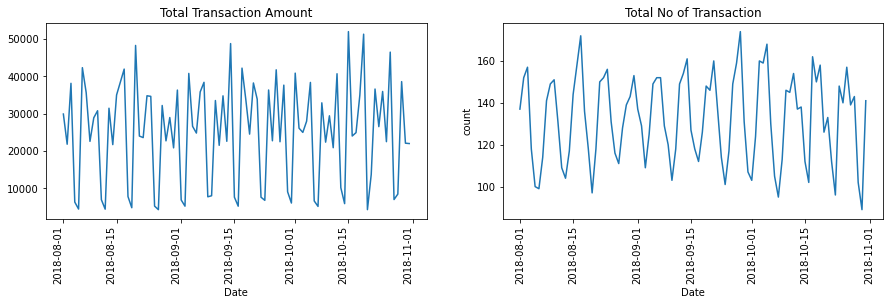

In [160]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
salesbydate2['sum'].plot(ax=ax1)
plt.tick_params(axis='x', rotation=90) 
ax1.set_title('Total Transaction Amount')

ax2=plt.subplot(122)
sns.lineplot(y="count",x=salesbydate2.index, data=salesbydate2)
plt.tick_params(axis='x', rotation=90) 
ax2.set_title('Total No of Transaction')
plt.show()

In [161]:
date = [salesbydate2 for salesbydate2, df in salesbydate2.groupby('Date')]

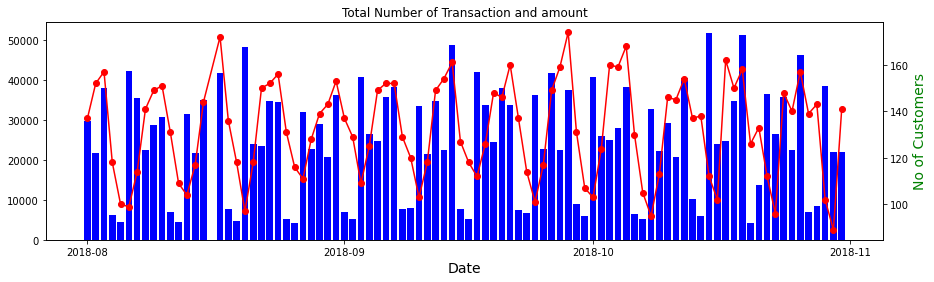

In [162]:
fig,ax = plt.subplots(figsize=(15,4))
ax2=ax.twinx()
ax.bar(date, salesbydate2['sum'], color="blue")
ax2.plot(date, salesbydate2['count'], color="red",marker="o")
ax.set_xlabel("Date",fontsize=14)
ax2.set_ylabel("Amout Sold",color="blue",fontsize=14)
ax2.set_ylabel("No of Customers",color="green",fontsize=14)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Total Number of Transaction and amount')
plt.show()


On most days, more customers does not neccessarily guarantee more transaction volume

In [287]:
#Average transaction volume for day of the week
#Add day of the week
df2["month"] = pd.DatetimeIndex(df2.date).month
df2["dayofweek"] = pd.DatetimeIndex(df2.date).dayofweek
df2[["date", "month", "dayofweek"]].head()

,date,month,dayofweek
0,2018-08-01,8,2
1,2018-08-01,8,2
2,2018-08-01,8,2
3,2018-08-01,8,2
4,2018-08-01,8,2


In [291]:
TransbyDay= pd.DataFrame(df2.groupby(['dayofweek'])['amount'].agg(['mean']).reset_index())
TransbyDay.rename(columns = {'mean': 'Avg_Trans_Amount'}, inplace = True)
TransbyDay.sort_values('Avg_Trans_Amount', ascending = False).head()

,dayofweek,Avg_Trans_Amount
0,0,373.221000
4,4,249.353517
1,1,221.576456
2,2,195.215570
3,3,184.010422


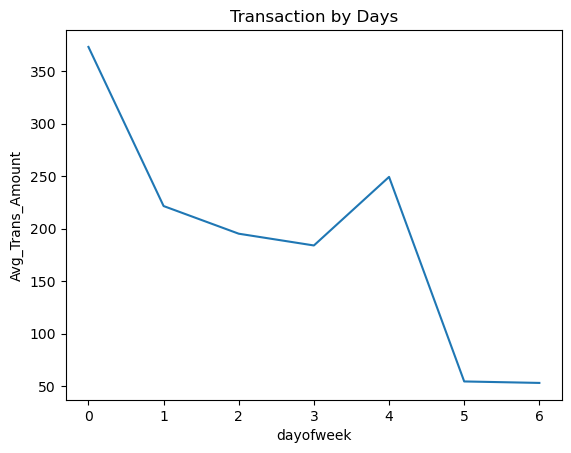

In [295]:
sns.lineplot(x='dayofweek',
    y='Avg_Trans_Amount',
    hue=None,
    data=TransbyDay)
plt.title("Transaction by Days")
plt.show()

More transaction occurs during week days, weekend has very little transaction compared to week days


Let's see a breakdown of these transactions by types of transactions.

In [312]:
df2.loc[df2.txn_description == "PAY/SALARY", "category"] = "Salary"
df2.loc[(df2.txn_description == "SALES-POS") | (df2.txn_description == "POS"), "category"] = "Purchase"
df2.category.fillna("Others", inplace = True)
df2[["txn_description", "category"]].head(10)

,txn_description,category
0,POS,Purchase
1,SALES-POS,Purchase
2,POS,Purchase
3,SALES-POS,Purchase
4,SALES-POS,Purchase
5,PAYMENT,Others
6,SALES-POS,Purchase
7,POS,Purchase
8,POS,Purchase
9,INTER BANK,Others


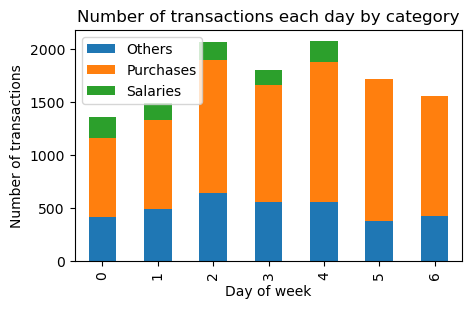

In [330]:
stacked_barplot = pd.DataFrame(df2.groupby(["dayofweek", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (5, 3))
plt.title("Number of transactions each day by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Day of week")
plt.show()

No salaries were paid on Friday and Saturday, therefore lower average transaction volume on those days.

Also, it appear  people  don't spend more on purchases over the weekends.

In [323]:
#Total transaction by date and hour
peakhours= pd.DataFrame(df2.groupby(['hour', 'gender'])['amount'].agg(['sum','count']).reset_index())
peakhours.rename(columns = {'sum': 'Trans_Amount','count': 'No of Customer'}, inplace = True)
peakhours.sort_values('Trans_Amount', ascending = False).head()

,hour,gender,Trans_Amount,No of Customer
35,17,M,305875.09,438
27,13,M,233169.03,305
34,17,F,173082.40,377
23,11,M,158481.63,477
22,11,F,138625.57,464


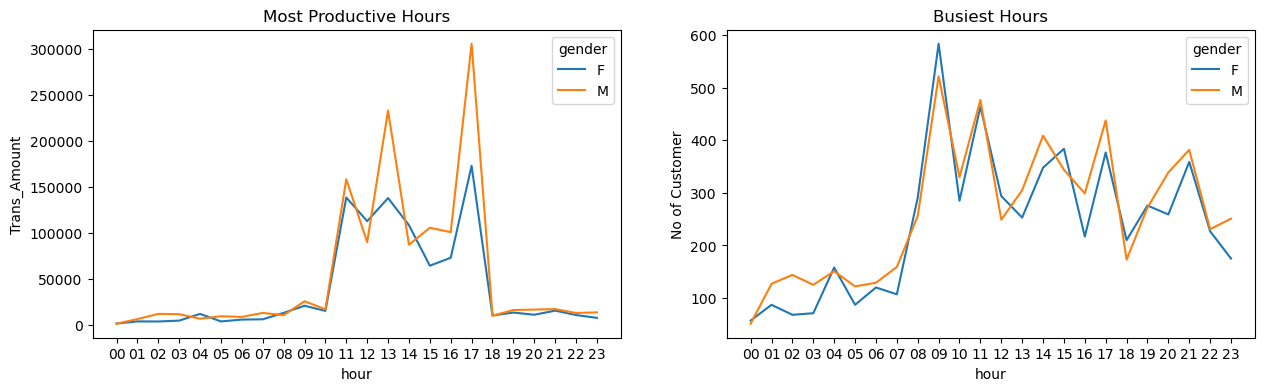

In [331]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
sns.lineplot(y="Trans_Amount",x="hour",hue="gender", data=peakhours)
ax1.set_title( 'Most Productive Hours')

ax2=plt.subplot(122)
sns.lineplot(y="No of Customer",x="hour",hue="gender", data=peakhours)
ax2.set_title('Busiest Hours')
plt.show()

Businest hours do not have the highest transactions volume, this means, more high spenders acutally come in late afternoons and evening.


More transaction amount is recorded from 10 to 18:00 despite not having as much transactions numbers as 07 to 09


Lets see a break down of the category of transactions

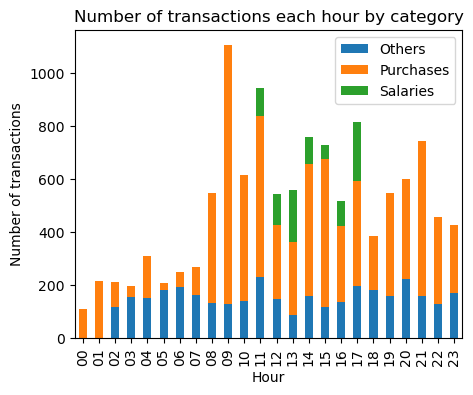

In [329]:
stacked_barplot = pd.DataFrame(df2.groupby(["hour", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (5, 4))
plt.title("Number of transactions each hour by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Hour")
plt.show()

In [164]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

Transaction by Category and Movement

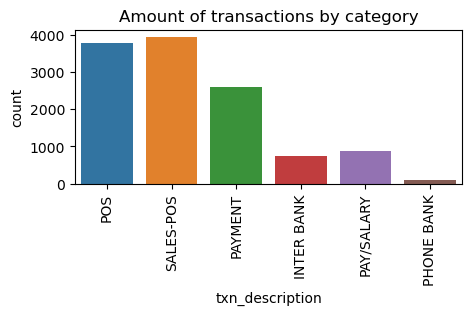

In [333]:
plt.figure(figsize = (5, 2))
sns.countplot(df2.txn_description)
plt.tick_params(axis='x', rotation=90) 
plt.title("Amount of transactions by category")
plt.show()

These are the descriptions for each transaction. Transactions mostly consist of sales payment.



In [335]:
df[["txn_description", "amount"]].groupby("txn_description", as_index = False).mean().sort_values(by = "amount", ascending = False)

,txn_description,amount
1,PAY/SALARY,1898.728029
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
4,POS,40.407412
5,SALES-POS,39.909789


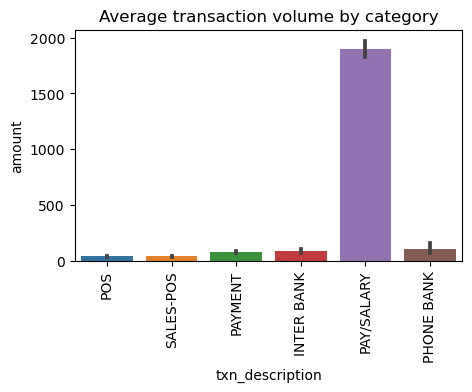

In [338]:
plt.figure(figsize = (5, 3))
sns.barplot(x = "txn_description", y = "amount", data = df2)
plt.tick_params(axis='x', rotation=90) 
plt.title("Average transaction volume by category")
plt.show()

Quite understandable that Pay/salary has the largest average transaction volume.

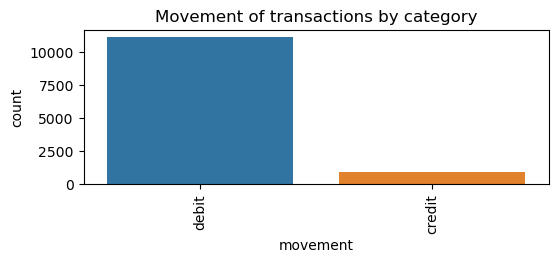

In [365]:
plt.figure(figsize = (6, 2))
sns.countplot(df2.movement)
plt.tick_params(axis='x', rotation=90) 
plt.title("Movement of transactions by category")
plt.show()

### Transaction by Gender

In [171]:
#sns.barplot(y="amount", x="gender", data=df2)
#sns.barplot(y="customer_id", x="gender", data=df2)

In [172]:
Trans_Date = pd.DataFrame(df2.groupby(['date', 'gender'])['amount'].sum().reset_index())
Trans_Date.head()

,date,gender,amount
0,2018-08-01,F,13628.64
1,2018-08-01,M,16239.30
2,2018-08-02,F,5896.25
3,2018-08-02,M,15890.07
4,2018-08-03,F,17091.59


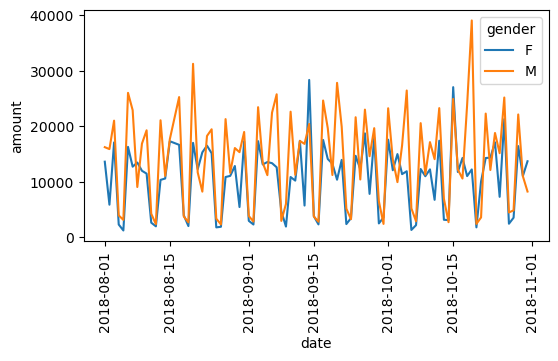

In [366]:
plt.figure(figsize=(6, 3))
sns.lineplot(y="amount",x="date",hue="gender", data=Trans_Date)
plt.tick_params(axis='x', rotation=90)
plt.show()

Men has more transaction amount than women except in mid September and October 2019 

Men has more customers than women and have an higher average amount

### Transaction by state or Location

In [215]:
df2.head(3)

,status,account,long_lat,txn_description,merchant_id,balance,date,hour,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,authorized,1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,35.39,2018-08-01,01,F,26,Ashmore,QLD,2018-08-01_01_01_15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,2487424745,153.38 -27.99,debit
1,authorized,1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,21.20,2018-08-01,01,F,26,Sydney,NSW,2018-08-01_01_13_45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,2487424745,151.21 -33.87,debit
2,authorized,1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,5.71,2018-08-01,01,M,38,Sydney,NSW,2018-08-01_01_26_15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,2142601169,151.21 -33.87,debit


In [211]:
mstate = pd.DataFrame(df2.groupby(["merchant_state",'txn_description'])["amount"].sum().reset_index())
mstate.head()

,merchant_state,txn_description,amount
0,ACT,POS,3824.94
1,ACT,SALES-POS,1051.74
2,NSW,POS,47269.63
3,NSW,SALES-POS,54752.14
4,NT,POS,3811.60


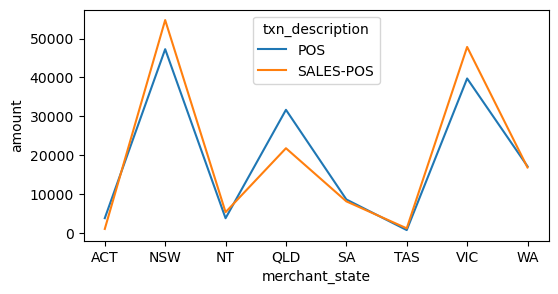

In [340]:
plt.figure(figsize=(6, 3))
sns.lineplot(y="amount",x="merchant_state",hue="txn_description", data=mstate)
plt.show()

VIC and NSW are the two leading states with regards to transaction amount. 

Only POS and Sales-POS transaction were recorded for state, other forms of transaction didnt specify where it occured. That is obviosly a data quality issue

In [341]:
Category_by_State = pd.DataFrame(df2.groupby(["merchant_state",'category'])["amount"].sum().reset_index())
Category_by_State.head()

,merchant_state,category,amount
0,ACT,Purchase,4876.68
1,NSW,Purchase,102021.77
2,NT,Purchase,9168.89
3,QLD,Purchase,53483.45
4,SA,Purchase,16776.57


<AxesSubplot:xlabel='merchant_state', ylabel='amount'>

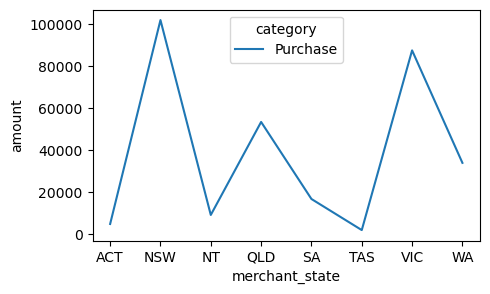

In [347]:
plt.figure(figsize=(5, 3))
sns.lineplot(x='merchant_state', y='amount', hue ='category', data =Category_by_State )

No transaction recorded for other categories. another data quality issues here

In [177]:
StatebyDate = pd.DataFrame(df2.groupby(['merchant_state', 'date']).sum()['amount'])
Statebyhour = pd.DataFrame(df2.groupby(['merchant_state', 'hour']).sum()['amount'])

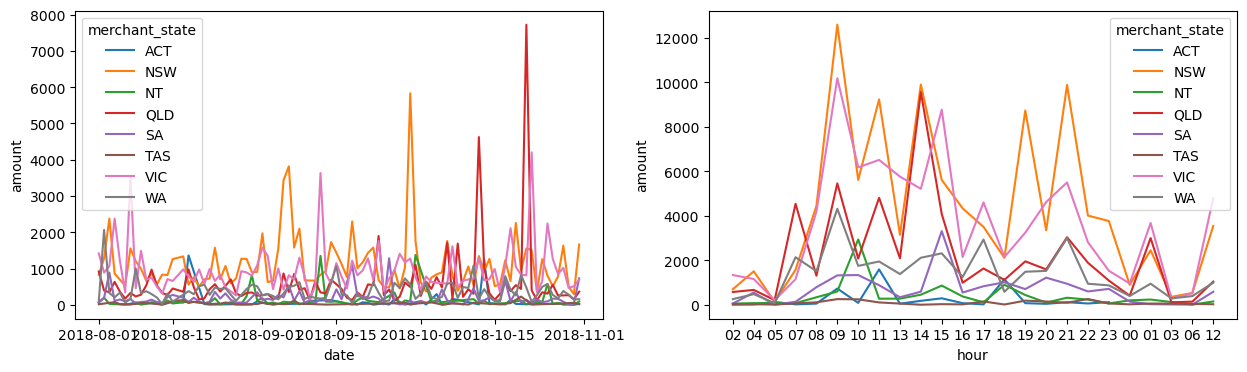

In [178]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
sns.lineplot(y="amount",x="date",hue="merchant_state", data=StatebyDate)

ax2=plt.subplot(122)
sns.lineplot(y="amount",x="hour",hue="merchant_state", data=Statebyhour)
plt.show()

In [179]:
Statebyage = pd.DataFrame(df2.groupby(['merchant_state', 'age']).sum()['amount'])
Statebygender = pd.DataFrame(df2.groupby(['merchant_state', 'gender']).sum()['amount'])

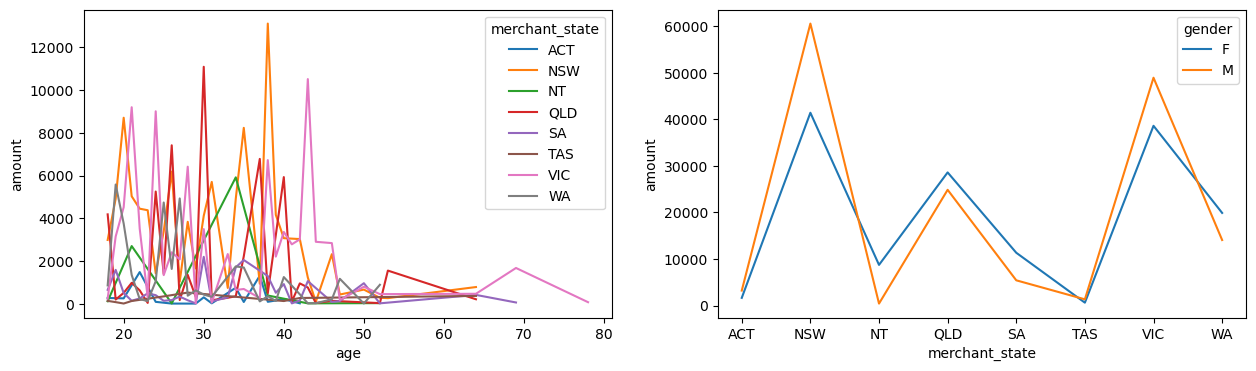

In [180]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
sns.lineplot(y="amount",x="age",hue="merchant_state", data=Statebyage)

ax2=plt.subplot(122)
sns.lineplot(y="amount",x="merchant_state",hue="gender", data=Statebygender)
plt.show()

In [284]:
#Average Spend by Customer per merchant_state
AvrCustSpendbyState = pd.DataFrame(df2.groupby(['merchant_state']).mean()['amount']) .sort_values('amount', ascending = False)
AvrCustSpendbyState.head()

,amount
merchant_state,
ACT,66.803836
NSW,47.036316
NT,44.726293
VIC,41.099953
SA,40.425470


Transaction by Subrub

In [80]:
msubrubhead = pd.DataFrame(df2.groupby(["merchant_suburb"])["amount"].sum().reset_index().sort_values('amount', ascending= False).head(10))
msubrubtail = pd.DataFrame(df2.groupby(["merchant_suburb"])["amount"].sum().reset_index().sort_values('amount', ascending= False).tail(10))

In [90]:
msubrubhead.head()

,merchant_suburb,amount
1380,Sydney,21675.44
893,Melbourne,11943.53
1322,South Brisbane,11740.58
880,Mascot,10282.62
978,Mount Gambier,4710.25


In [91]:
msubrubtail.head()

,merchant_suburb,amount
424,Duaringa,5.04
1431,Tottenham,4.57
788,Larrakeyah,4.56
419,Dover Heights,4.49
877,Marsfield,3.96


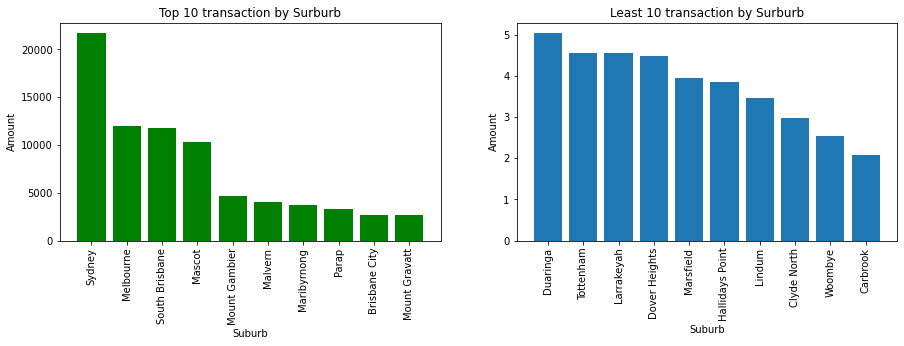

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
ax1.bar('merchant_suburb', 'amount', color = 'green', data =msubrubhead)
plt.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Amount')
ax1.set_xlabel("Suburb")
ax1.set_title( 'Top 10 transaction by Surburb')

ax2=plt.subplot(122)
plt.bar('merchant_suburb', 'amount', data =msubrubtails)
plt.tick_params(axis='x', rotation=90) 
ax2.set_ylabel('Amount')
ax2.set_xlabel('Suburb')
plt.title('Least 10 transaction by Surburb')
plt.show()


Sydney is the suburb with the largest amount of transaction with Melbourne, South Bri and Mascot following each other closely at a distance second, third and forth respectively. 

In [84]:
state_suburb_head = pd.DataFrame(df2.groupby(["merchant_state", "merchant_suburb"])["amount"].sum().sort_values(ascending=True).head(20))
state_suburb_head.head(2)
state_suburb_tail = pd.DataFrame(df2.groupby(["merchant_state", "merchant_suburb"])["amount"].sum().sort_values(ascending= True).tail(20))
state_suburb_tail.head()

amount
merchant_state merchant_suburb         
NSW            Chatswood        1860.84
               Newtown          1922.39
VIC            South Melbourne  1936.87
QLD            Broadbeach       2003.30
VIC            Abbotsford       2004.29

<AxesSubplot:ylabel='merchant_state,merchant_suburb'>

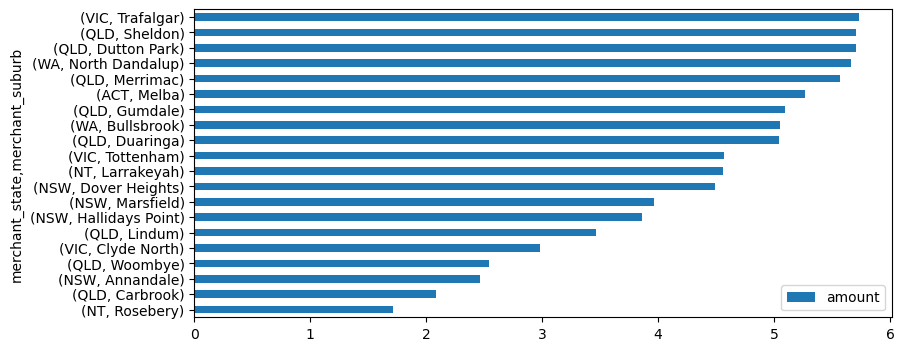

In [363]:
state_suburb_head.plot.barh(figsize=(9,4))

About 8 surburbs in  QLD record some of the highest transactions, followed by NSW 

<AxesSubplot:ylabel='merchant_state,merchant_suburb'>

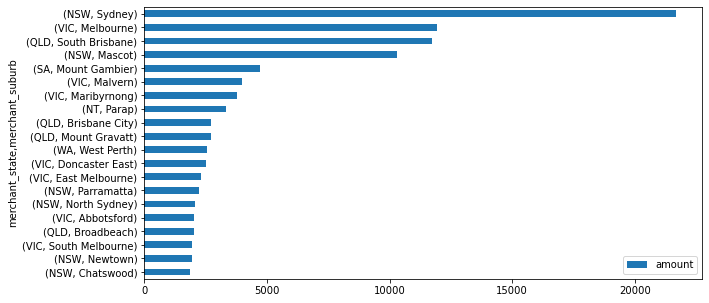

In [86]:
state_suburb_tail.plot.barh(figsize=(10,5))

In [285]:
#Average Spend by Customer per merchant_suburb
AvrCustSpendSub= pd.DataFrame(df2.groupby(['merchant_suburb']).mean()['amount']).sort_values('amount', ascending = False)
AvrCustSpendSub.head()

,amount
merchant_suburb,
Pantapin,829.765000
Gladesville,734.100000
West Wodonga,559.330000
South Brisbane,559.075238
Parap,553.918333


### Total transaction by age

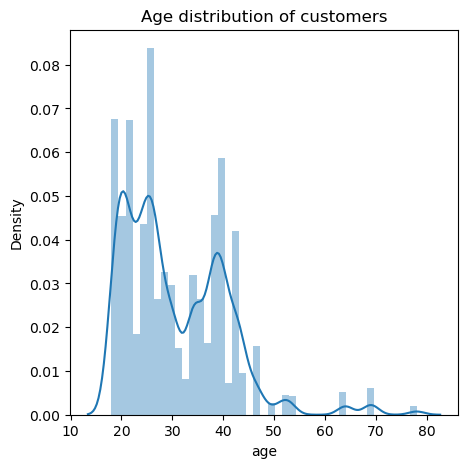

In [267]:
plt.figure(figsize = (5,5))
sns.distplot(df2.age)
plt.title("Age distribution of customers")
plt.show()

Most customers are between the ages of 20 to 38

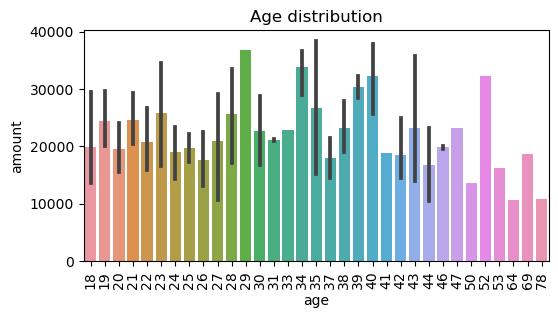

In [251]:
plt.figure(figsize = (6, 3))
sns.barplot(y="amount",x="age", data=CustAge)
plt.tick_params(axis='x', rotation=90) 
plt.title("Transaction by Age distribution")
plt.show()

No significant relationship betwen age of customer and amount of their transaction

In [306]:
customer_monthly_volume = pd.DataFrame(df2.groupby("customer_id")['amount'].agg(['sum']).sort_values('sum', ascending= False))
customer_monthly_volume.head()

,sum
customer_id,
2738291516,45409.16
3142625864,42688.30
1816693151,40215.54
2155701614,37943.79
261674136,36786.13


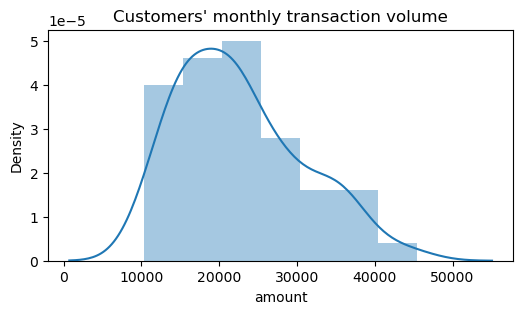

In [221]:
plt.figure(figsize = (6, 3))
sns.distplot(customer_monthly_volume.amount)
plt.title("Customers' monthly transaction volume")
plt.show()

In [276]:
#Average Spend by Customer per age
AvrCustSpendAge = pd.DataFrame(df2.groupby(['age']).mean()['amount']).sort_values('amount', ascending = False)
AvrCustSpendAge.head()

,amount
age,
52,418.742468
78,318.977941
42,317.231595
50,307.334318
35,300.101667


In [237]:
#age of the highest spending customers
HighestSpenderAge= pd.DataFrame(df2.groupby(['customer_id','age'])['amount'].sum().reset_index())
HighestSpenderAge.head(7)

,customer_id,age,amount
0,1005756958,53,16268.97
1,1117979751,21,33984.37
2,1140341822,28,17010.60
3,1147642491,34,28980.82
4,1196156254,34,36050.72
5,1220154422,25,20596.11
6,1233833708,44,10385.54
